In [ ]:

https://colab.research.google.com/drive/11GmF64YVSaUzeuahvPC-hXB0cKctilMi

In [ ]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.colors as col
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
from pathlib import Path
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#df =pd.read_csv("/content/Sales (1).csv")

In [ ]:
df =pd.read_csv("drive/My Drive/IBM_Project/Dataset/Sales (1).csv")

In [ ]:
from datetime import datetime, timedelta
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 7, 19)

# Create a range of date-time values between start and end dates
date_range = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

In [ ]:
# Iterate through the columns in the DataFrame
for column in df.columns:
    # Add the date-time values to each column
    df['DateTime'] = date_range


In [ ]:
df

,Date,TV,Radio,Newspaper,Sales,DateTime
0,12-04-2023,230.1,37.8,69.2,22.1,2023-01-01
1,13-04-2023,44.5,39.3,45.1,10.4,2023-01-02
2,14-04-2023,17.2,45.9,69.3,12.0,2023-01-03
3,15-04-2023,151.5,41.3,58.5,16.5,2023-01-04
4,16-04-2023,180.8,10.8,58.4,17.9,2023-01-05
...,...,...,...,...,...,...
195,24-10-2023,38.2,3.7,13.8,7.6,2023-07-15
196,25-10-2023,94.2,4.9,8.1,14.0,2023-07-16
197,26-10-2023,177.0,9.3,6.4,14.8,2023-07-17
198,27-10-2023,283.6,42.0,66.2,25.5,2023-07-18


In [ ]:
df.dtypes

Date                 object
TV                  float64
Radio               float64
Newspaper           float64
Sales               float64
DateTime     datetime64[ns]
dtype: object

In [ ]:
missing_values = df.isna()
total_missing = missing_values.sum().sum()
total_missing

0

In [ ]:
import plotly.express as px

In [ ]:
fig = px.line(df, x='DateTime', y='Sales', title='Total Sales')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(step="all")
        ])
    )
)
fig.show()

In [ ]:
el_df=df.set_index('DateTime')

array([<Axes: xlabel='DateTime'>, <Axes: xlabel='DateTime'>,
       <Axes: xlabel='DateTime'>, <Axes: xlabel='DateTime'>], dtype=object)

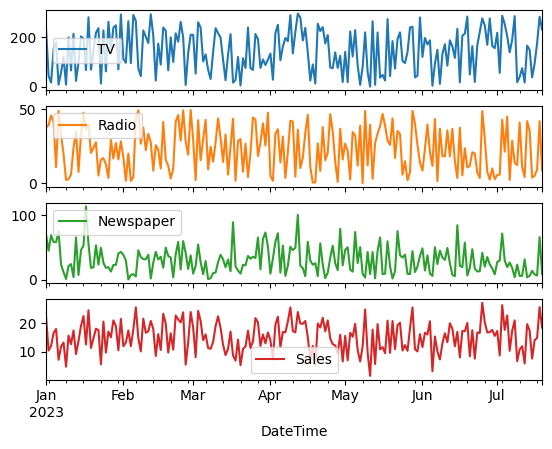

In [ ]:
el_df.plot(subplots=True)

In [ ]:
print ("\nMissing values :  ", df.isnull().any())


Missing values :   Date         False
TV           False
Radio        False
Newspaper    False
Sales        False
DateTime     False
dtype: bool


In [ ]:
el_df.resample('M').mean()

<ipython-input-19-421011436e0d>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,TV,Radio,Newspaper,Sales
DateTime,,,,
2023-01-31,142.064516,24.319355,37.841935,14.954839
2023-02-28,167.635714,24.878571,29.460714,16.478571
2023-03-31,126.100000,25.803226,29.780645,14.367742
2023-04-30,160.776667,21.656667,34.086667,16.020000
2023-05-31,128.183871,25.816129,29.877419,13.838710
2023-06-30,155.813333,19.100000,27.806667,15.093333
2023-07-31,154.221053,19.968421,21.400000,15.436842


<ipython-input-20-052b9850bc35>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



array([<Axes: xlabel='DateTime'>, <Axes: xlabel='DateTime'>,
       <Axes: xlabel='DateTime'>, <Axes: xlabel='DateTime'>], dtype=object)

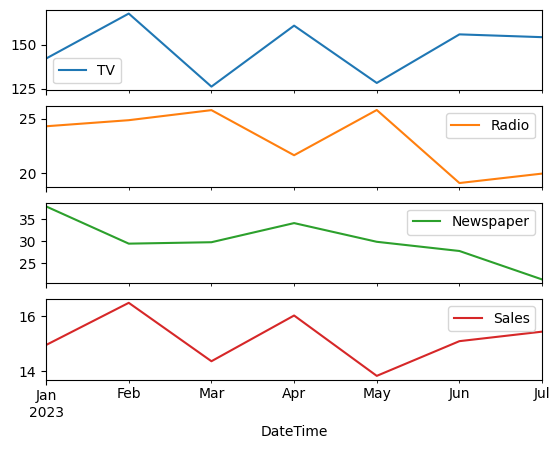

In [ ]:
el_df.resample('M').mean().plot(subplots=True)

In [ ]:
final_df=el_df.resample('M').mean()
final_df

<ipython-input-21-262a0f12b9cd>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,TV,Radio,Newspaper,Sales
DateTime,,,,
2023-01-31,142.064516,24.319355,37.841935,14.954839
2023-02-28,167.635714,24.878571,29.460714,16.478571
2023-03-31,126.100000,25.803226,29.780645,14.367742
2023-04-30,160.776667,21.656667,34.086667,16.020000
2023-05-31,128.183871,25.816129,29.877419,13.838710
2023-06-30,155.813333,19.100000,27.806667,15.093333
2023-07-31,154.221053,19.968421,21.400000,15.436842


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.1 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm

In [ ]:
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
import pickle
import warnings

In [ ]:

from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['Sales'])

In [ ]:
model = pm.auto_arima(final_df['Sales'],
                        m=12, seasonal=False,
                      start_p=0, start_q=0, max_order=4, error_action='ignore',
                           suppress_warnings=True,
                      stepwise=True, trace=True)

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning:

m (12) set for non-seasonal fit. Setting to 0



Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=59.957, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=21.474, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20.463, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=22.433, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=34.692, Time=0.22 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.370 seconds


In [ ]:
train=final_df[(final_df.index.get_level_values(0) >= '2023-01-31') & (final_df.index.get_level_values(0) <= '2023-05-31')]

In [ ]:
test=final_df[(final_df.index.get_level_values(0) > '2023-05-31')]

In [ ]:
test

,TV,Radio,Newspaper,Sales
DateTime,,,,
2023-06-30,155.813333,19.100000,27.806667,15.093333
2023-07-31,154.221053,19.968421,21.400000,15.436842


In [ ]:
model.fit(train['Sales'])

ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
forecast=model.predict(n_periods=4, return_conf_int=True)

In [ ]:
forecast

(2023-06-30    16.519554
 2023-07-31    14.269223
 2023-08-31    16.158176
 2023-09-30    14.572567
 Freq: M, dtype: float64,
 array([[15.42250821, 17.61659955],
        [12.83691124, 15.70153389],
        [14.53059205, 17.78576082],
        [12.82041195, 16.32472192]]))

In [ ]:
forecast_df = pd.DataFrame(forecast[0],index = test.index,columns=['Prediction'])

In [ ]:
forecast_df

,Prediction
DateTime,
2023-06-30,16.519554
2023-07-31,14.269223


In [ ]:
import matplotlib.pyplot as plt

<Axes: xlabel='DateTime'>

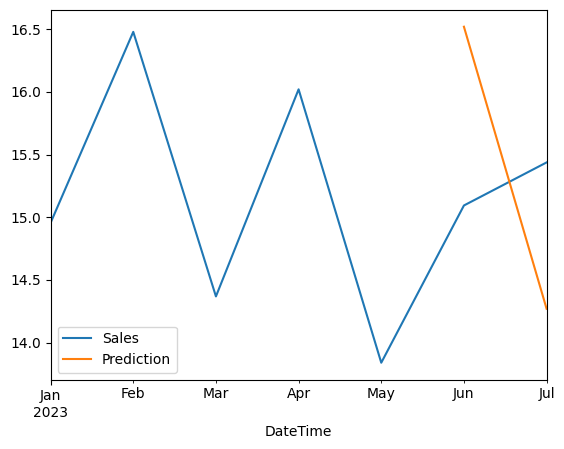

In [ ]:
pd.concat([final_df['Sales'],forecast_df],axis=1).plot()

In [ ]:
forecast1=model.predict(n_periods=8, return_conf_int=True)
forecast_range=pd.date_range(start='2023-06-30', periods=8,freq='M')

In [ ]:
forecast1_df = pd.DataFrame(forecast1[0],index =forecast_range,columns=['Prediction'])

<Axes: >

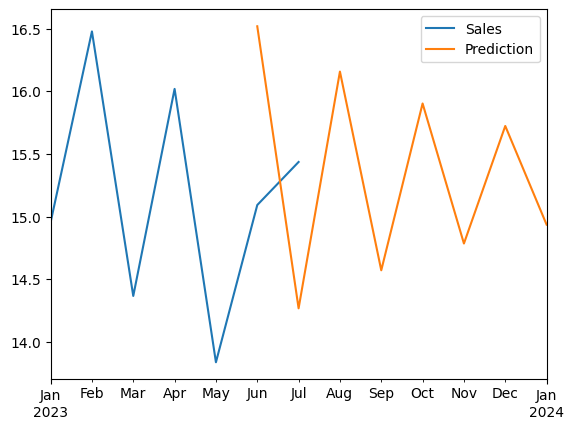

In [ ]:
pd.concat([final_df['Sales'],forecast1_df],axis=1).plot()